In [3]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv('reading.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   특성별(1)                    15 non-null     object 
 1   특성별(2)                    15 non-null     object 
 2   독서함 (%)_2009              15 non-null     object 
 3   독서인구 1인당 평균독서권수 (권)_2009  15 non-null     object 
 4   인구 1인당 평균독서권수 (권)_2011    14 non-null     float64
 5   독서함 (%)_2011              14 non-null     float64
 6   독서인구 1인당 평균독서권수 (권)_2011  14 non-null     float64
 7   인구 1인당 평균독서권수 (권)_2013    14 non-null     float64
 8   독서함 (%)_2013              14 non-null     float64
 9   독서인구 1인당 평균독서권수 (권)_2013  14 non-null     float64
 10  인구 1인당 평균독서권수 (권)_2015    14 non-null     float64
 11  독서함 (%)_2015              14 non-null     float64
 12  독서인구 1인당 평균독서권수 (권)_2015  14 non-null     float64
 13  인구 1인당 평균독서권수 (권)_2017    14 non-null     float64
 14  독서함 (%)_2017

In [67]:
is_data = data[data['특성별(1)'] == '연령']
is_data

,특성별(1),특성별(2),독서함 (%)_2009,독서인구 1인당 평균독서권수 (권)_2009,인구 1인당 평균독서권수 (권)_2011,독서함 (%)_2011,독서인구 1인당 평균독서권수 (권)_2011,인구 1인당 평균독서권수 (권)_2013,독서함 (%)_2013,독서인구 1인당 평균독서권수 (권)_2013,...,독서함 (%)_2015,독서인구 1인당 평균독서권수 (권)_2015,인구 1인당 평균독서권수 (권)_2017,독서함 (%)_2017,인구 1인당 평균독서권수 (권)_2019,독서함 (%)_2019,독서인구 1인당 평균독서권수 (권)_2019,인구 1인당 평균독서권수 (권)_2021,독서함 (%)_2021,독서인구 1인당 평균독서권수 (권)_2021
2,연령,13∼19세,-,-,22.2,80.1,27.7,20.0,80.9,24.7,...,74.2,20.2,15.7,73.8,13.1,70.9,18.4,13.1,67.3,19.5
3,연령,15∼19세,78.3,22.7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,-,-
4,연령,20∼29세,81.6,21.9,18.8,76.9,24.5,17.2,79.8,21.6,...,73.8,18.9,14.5,70.4,9.8,66.0,14.9,8.8,57.7,15.3
5,연령,30∼39세,78.9,18.4,16.6,75.8,21.9,14.5,75.8,19.2,...,68.5,19.1,12.4,67.9,9.9,63.2,15.6,9.8,55.1,17.8
6,연령,40∼49세,67.6,15.4,13.0,68.0,19.2,11.7,69.5,16.8,...,63.2,15.2,11.7,63.3,9.2,59.0,15.7,9,55.1,16.3
7,연령,50∼59세,48.7,11.9,7.7,51.9,14.7,6.2,52.4,11.7,...,47.1,12.6,6.0,47.8,5.2,43.6,11.9,5.3,41.9,12.8
8,연령,60∼69세,29.8,9.7,4.0,34.7,11.5,3.7,38.2,9.8,...,34.9,10.6,4.0,35.2,3.3,33.6,9.8,3.5,31.3,11.1
9,연령,70∼79세,18.3,7.7,2.2,20.2,10.8,2.0,21.1,9.3,...,20.6,9.6,1.9,20.3,1.7,20.4,8.4,1.8,19.4,9.1
10,연령,80세 이상,11.7,6.1,1.2,11.8,10.1,0.8,13.1,5.9,...,12.8,10.5,1.5,12.8,0.7,11.0,6.1,0.7,10.8,6.7


In [68]:
is_data = is_data[['특성별(2)','독서인구 1인당 평균독서권수 (권)_2011','인구 1인당 평균독서권수 (권)_2011']]
is_data

,특성별(2),독서인구 1인당 평균독서권수 (권)_2011,인구 1인당 평균독서권수 (권)_2011
2,13∼19세,27.7,22.2
3,15∼19세,NaN,NaN
4,20∼29세,24.5,18.8
5,30∼39세,21.9,16.6
6,40∼49세,19.2,13.0
7,50∼59세,14.7,7.7
8,60∼69세,11.5,4.0
9,70∼79세,10.8,2.2
10,80세 이상,10.1,1.2


In [74]:
is_data = is_data.fillna(0)
is_data['특성별(2)'] = [1319, 1519, 2029, 3039, 4049, 5059, 6069, 7079, 8000]
is_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 2 to 10
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   특성별(2)                    9 non-null      int64  
 1   독서인구 1인당 평균독서권수 (권)_2011  9 non-null      float64
 2   인구 1인당 평균독서권수 (권)_2011    9 non-null      float64
dtypes: float64(2), int64(1)
memory usage: 288.0 bytes


In [75]:
x=is_data[['특성별(2)']]
x

,특성별(2)
2,1319
3,1519
4,2029
5,3039
6,4049
7,5059
8,6069
9,7079
10,8000


In [76]:
y1=is_data[['독서인구 1인당 평균독서권수 (권)_2011']]
y1

,독서인구 1인당 평균독서권수 (권)_2011
2,27.7
3,0.0
4,24.5
5,21.9
6,19.2
7,14.7
8,11.5
9,10.8
10,10.1


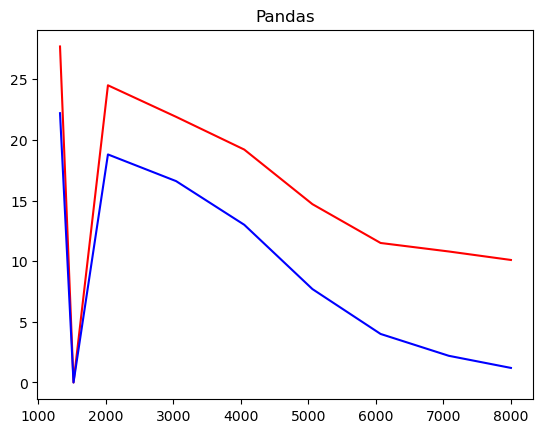

In [78]:
plt.title("Pandas")
# plt.plot(data['측정수(건)'], data['표준편차(mmHg)'], bins=30, alpha = head7, density = True)
# plt.hist(data)
plt.plot(is_data[['특성별(2)']], is_data[['독서인구 1인당 평균독서권수 (권)_2011']], color = 'red')
plt.plot(is_data[['특성별(2)']], is_data[['인구 1인당 평균독서권수 (권)_2011']], color = 'blue')
# plt.scatter(data['독서인구 1인당 평균독서권수 (권)_2011'], data['인구 1인당 평균독서권수 (권)_2011'])
plt.show()
# plt.scatter(data['독서인구 1인당 평균독서권수 (권)_2011'], data['인구 1인당 평균독서권수 (권)_2011']) 양의 상관계수